## PROBLEM STATEMENT

#### Loan Application Status Prediction
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables: 

- Loan_ID 
- Gender 
- Married 
- Dependents 
- Education 
- Self_Employed 
- ApplicantIncome 
- CoapplicantIncome 
- Loan_Amount 
- Loan_Amount_Term 
- Credit History 
- Property_Area

#### Dependent Variable (Target Variable): 

- Loan_Status

To build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
# Import Necessary Libraries
import numpy as np #numerical python
import pandas as pd #Data manipulation and Analysis

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression and Classification task
from sklearn.preprocessing import StandardScaler #standardization
from sklearn.linear_model import LinearRegression #Regression
from sklearn.linear_model import LogisticRegression #Classification
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing set
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, r2_score #Model Evaluation Metrics 

In [2]:
#Load the dataset
df = pd.read_csv('D:/Scifor/Final Projects Machine Learning/Project 11.0/loan_prediction.csv')

In [3]:
# first 5 rows of the data 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Check the dimensions of the dataset
df.shape

(614, 13)

In [5]:
# Check information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There are null values to be treated 

In [7]:
# Lets check the summary of the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## DATA  PREPROCESSING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Lets treat the null values with Categorical variables
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Self_Employed'].value_counts())

Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [10]:
df['Gender'].fillna(value = 'Male', inplace = True)
df['Married'].fillna(value = 'Yes', inplace = True)
df['Dependents'].fillna(value = 0, inplace = True)
df['Self_Employed'].fillna(value = 'No', inplace = True)

In [11]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Dependents'].value_counts())
print(df['Self_Employed'].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64
Married
Yes    401
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
0      15
Name: count, dtype: int64
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# Lets treat continuous feature null values of the dataset
print(df['LoanAmount'].value_counts())
print(df['Loan_Amount_Term'].value_counts())
print(df['Credit_History'].value_counts())

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [14]:
# Lets replace the null values with high in range values.
df['LoanAmount'].fillna(value= 120.0, inplace = True)
df['Loan_Amount_Term'].fillna(value = 360.0, inplace = True)
df['Credit_History'].fillna(value = 1.0, inplace = True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


* From the CoapplicantIncome feature we have more 0 values lets treat that.

In [17]:
df['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64

In [18]:
df['CoapplicantIncome'].mean()

1621.2457980271008

In [19]:
# Lets treat CoapplicantIncome feature impute the 0.0 values with mean value 
df['CoapplicantIncome'].replace(to_replace = 0.0, value = df['CoapplicantIncome'].mean(), inplace=True)

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,2342.092871,145.465798,342.410423,0.855049
std,6109.041673,2621.427966,84.180967,64.428629,0.352339
min,150.000000,16.120001,9.000000,12.000000,0.000000
25%,2877.500000,1621.245798,100.250000,360.000000,1.000000
50%,3812.500000,1621.245798,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [21]:
df['Credit_History'].value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* All null values and 0.0 values have treated.

In [23]:
# Lets replace Dependents feature '3+' value to '3' for the further analysis
df['Dependents'].replace(to_replace='3+', value = 3, inplace =True)

In [24]:
df['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
0     15
Name: count, dtype: int64

In [25]:
#Lets check the Loan Id
df['Loan_ID'].nunique()

614

In [26]:
# Lets drop the Loan ID feature because it is not going to be helpful for further analysis
df.drop(labels= 'Loan_ID', axis = 1, inplace = True)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y


### DATA VISUALIZATION

Text(0.5, 1.0, 'Married Applicants who are Educated and their Income ')

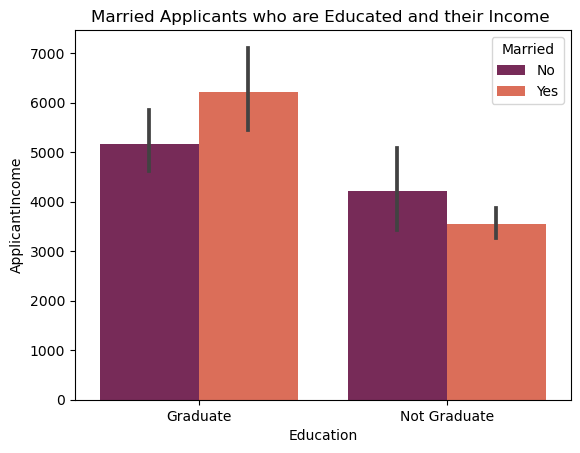

In [28]:
# Barplot with Education and ApplicantIncome with the Married Individuals
sns.barplot(data = df, x= 'Education', y= 'ApplicantIncome', hue='Married', palette='rocket' )
plt.title('Married Applicants who are Educated and their Income ')

Text(0.5, 1.0, "Applicant's Loan status with their Loan term and Income")

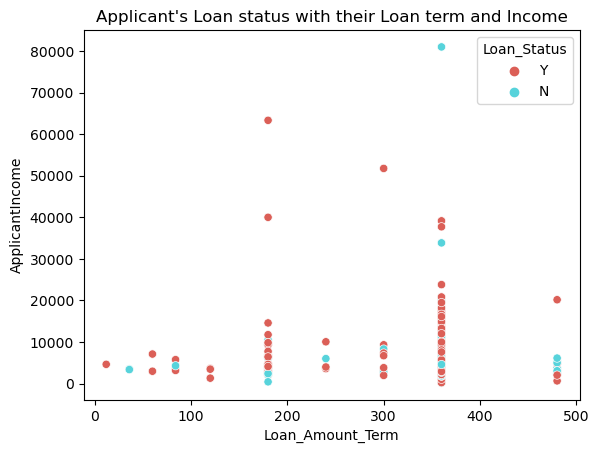

In [29]:
# Visualization on the Loan Amount Term and the Applicants Income with their Loan Status
sns.scatterplot(data=df, x='Loan_Amount_Term', y='ApplicantIncome', hue = 'Loan_Status', palette='hls')
plt.title ("Applicant's Loan status with their Loan term and Income")

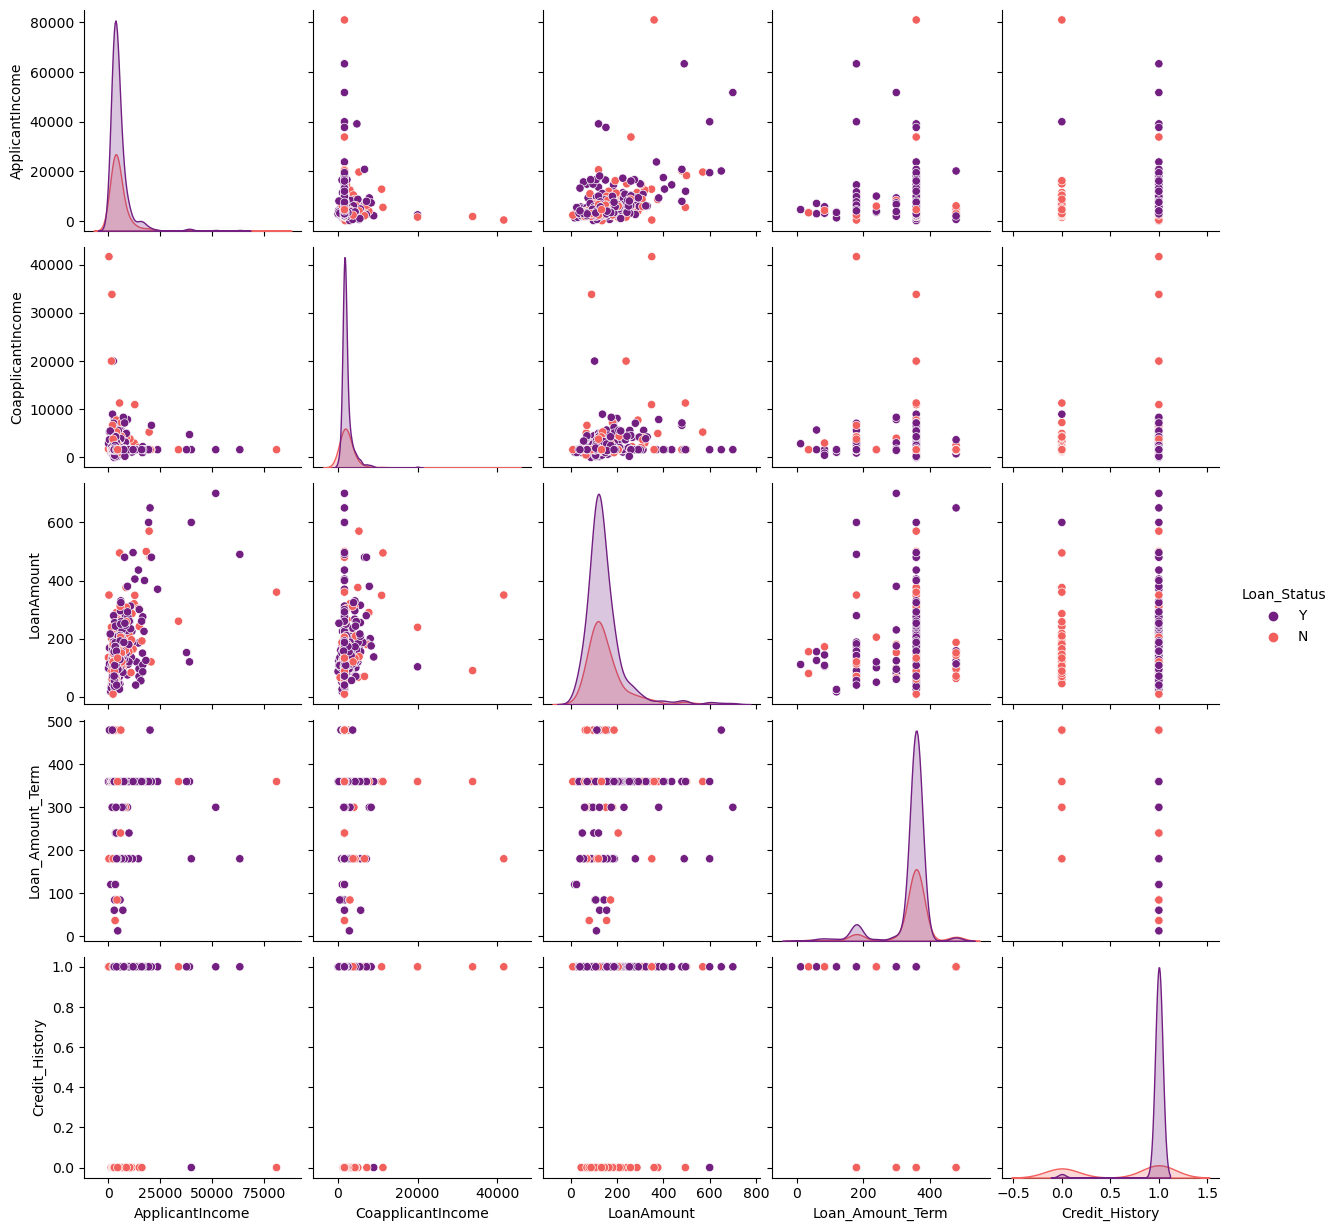

In [30]:
# Pairlot of the dataset with their Loan_status
sns.pairplot(data = df, hue= 'Loan_Status', palette='magma')

Text(0.5, 1.0, 'Loan Applicants Property Area')

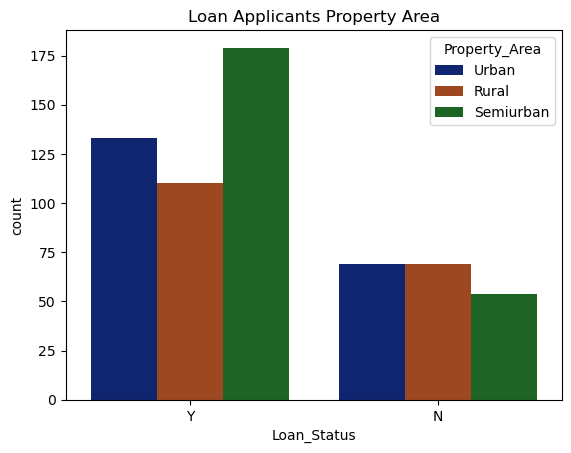

In [31]:
# Visualization of the Applicants with their Loan_status and property area
sns.countplot(data = df, x = 'Loan_Status', hue= 'Property_Area', palette = 'dark')
plt.title('Loan Applicants Property Area')

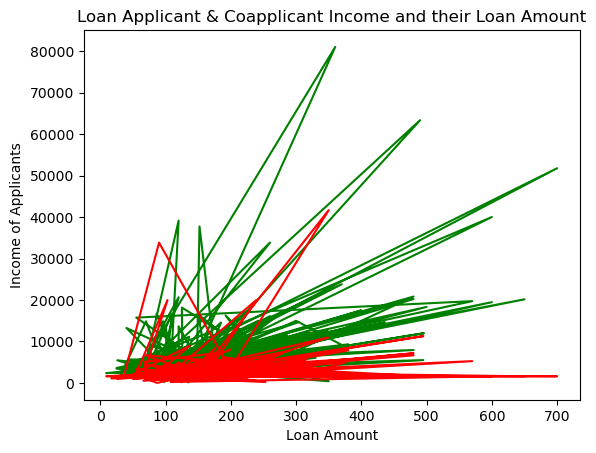

In [32]:
# PLot of the Loan Applicant's Income 
plt.plot(df['LoanAmount'], df['ApplicantIncome'], color = 'green')
plt.plot(df['LoanAmount'], df['CoapplicantIncome'], color = 'red')
plt.xlabel('Loan Amount')
plt.ylabel('Income of Applicants')
plt.title('Loan Applicant & Coapplicant Income and their Loan Amount')
plt.show()

Text(0.5, 1.0, 'Applicants who are Self Employed and their Property Area')

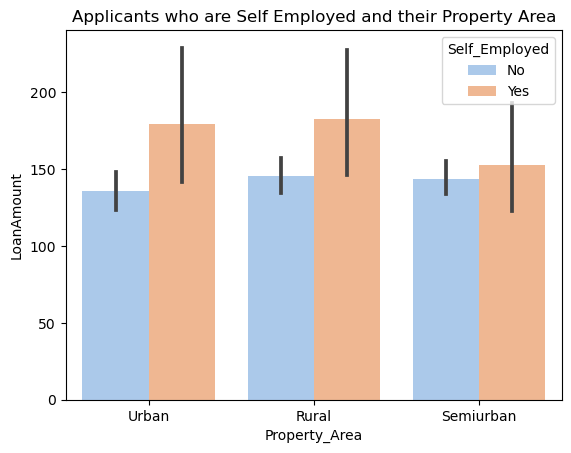

In [33]:
# Plot of the applicants who are self employed their Property area and Loan Amount
sns.barplot(data=df, x = 'Property_Area', y ='LoanAmount', hue= 'Self_Employed', palette='pastel')
plt.title('Applicants who are Self Employed and their Property Area')

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,1621.245798,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,1621.245798,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,1621.245798,141.0,360.0,1.0,Urban,Y


In [35]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,1621.245798,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1


In [36]:
df.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [37]:
# Change object datatype to integer
df['Dependents'] = df['Dependents'].astype(int)

In [38]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

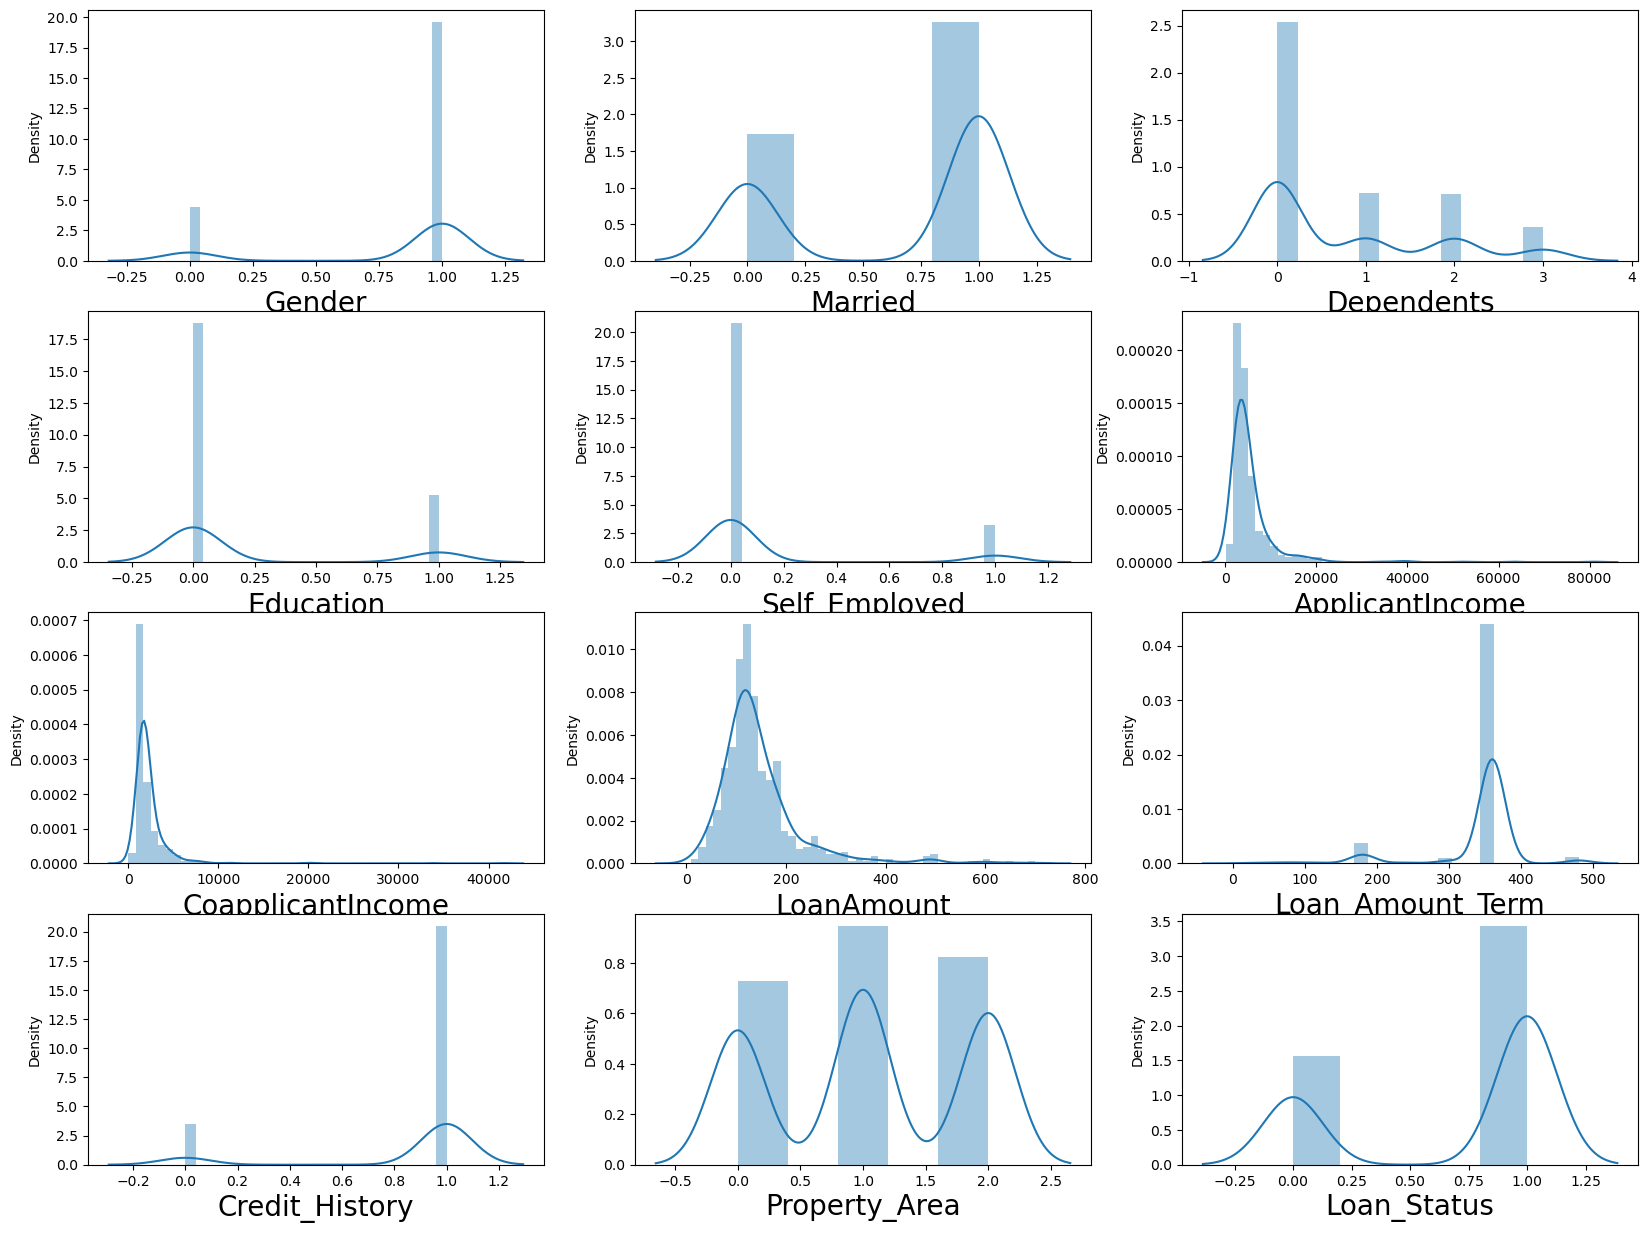

In [39]:
# Lets check the data distribution 

plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

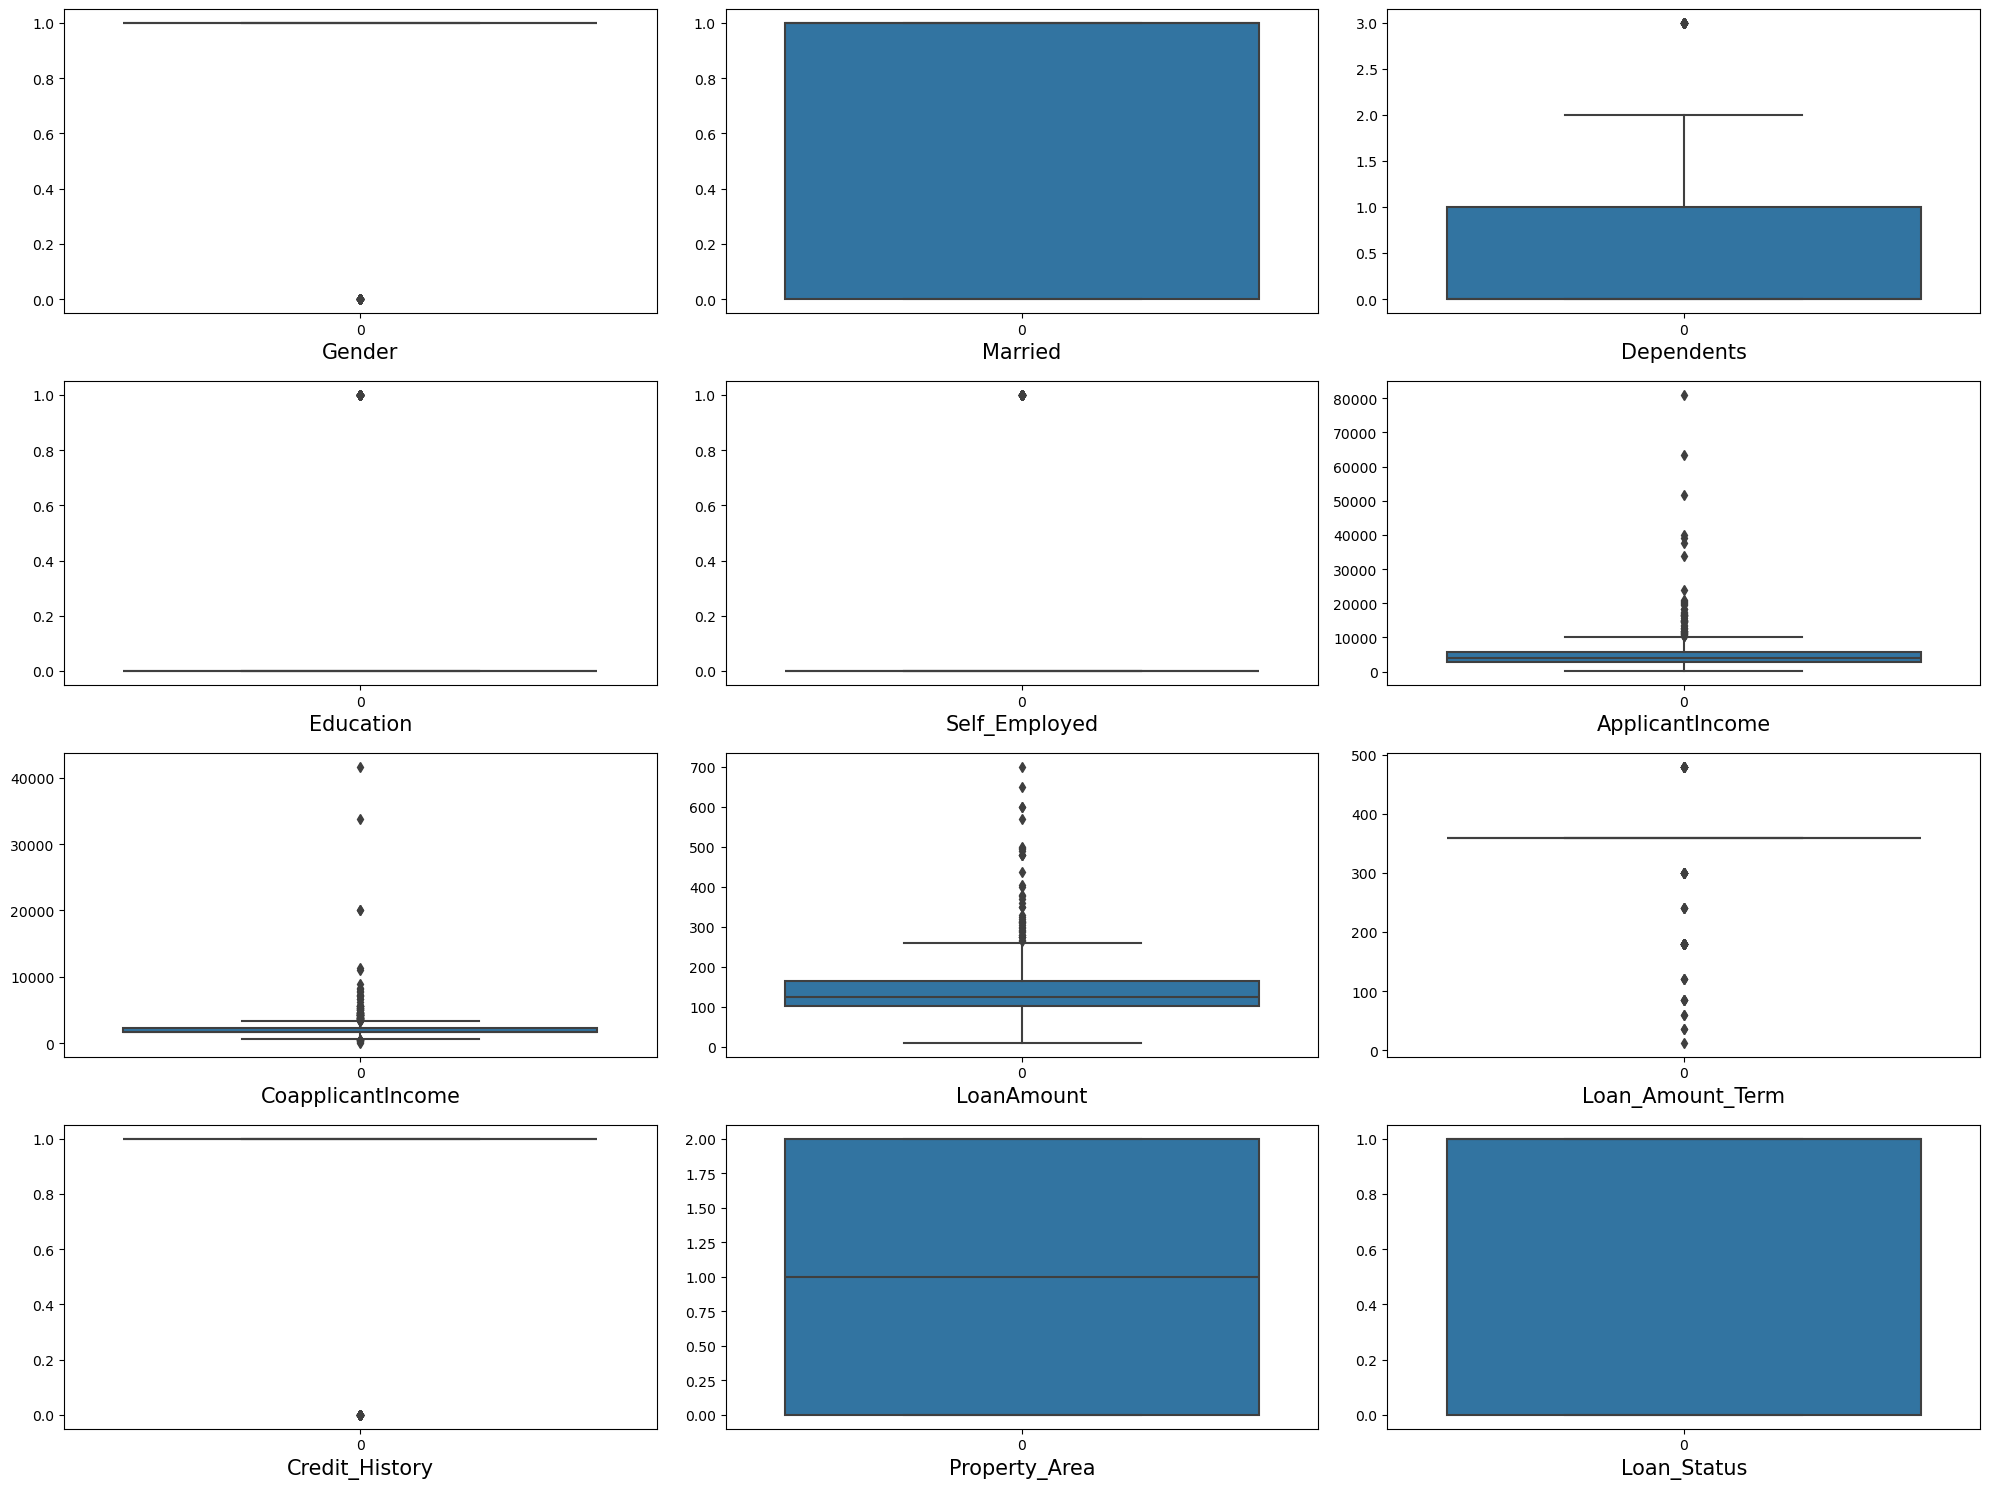

In [40]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

* Lets check the outliers for the continuous features and treat them

In [41]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [42]:
# Outliers 
#1st quantile
q1=df.quantile(0.25)

In [43]:
# 3rd quantile
q3=df.quantile(0.75)

In [44]:
#IQR
IQR=q3-q1

In [45]:
print(q1)
print(q3)
print(IQR)

Gender                  1.000000
Married                 0.000000
Dependents              0.000000
Education               0.000000
Self_Employed           0.000000
ApplicantIncome      2877.500000
CoapplicantIncome    1621.245798
LoanAmount            100.250000
Loan_Amount_Term      360.000000
Credit_History          1.000000
Property_Area           0.000000
Loan_Status             0.000000
Name: 0.25, dtype: float64
Gender                  1.00
Married                 1.00
Dependents              1.00
Education               0.00
Self_Employed           0.00
ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            164.75
Loan_Amount_Term      360.00
Credit_History          1.00
Property_Area           2.00
Loan_Status             1.00
Name: 0.75, dtype: float64
Gender                  0.000000
Married                 1.000000
Dependents              1.000000
Education               0.000000
Self_Employed           0.000000
ApplicantIncome      2917.500000
Coap

In [46]:
#Validating ApplicantIncome Outlier

pred_high = (q3.ApplicantIncome + (1.5 * IQR.ApplicantIncome))
pred_high

10171.25

In [47]:
index=np.where(df['ApplicantIncome']>pred_high)
index

(array([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
        146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
        324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
        487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604], dtype=int64),)

In [48]:
df=df.drop(df.index[index])

In [49]:
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,609,0,0,0,0,0,2900,1621.245798,71.0,360.0,1.0,0,1
560,610,1,1,3,0,0,4106,1621.245798,40.0,180.0,1.0,0,1
561,611,1,1,1,0,0,8072,240.000000,253.0,360.0,1.0,2,1
562,612,1,1,2,0,0,7583,1621.245798,187.0,360.0,1.0,2,1


In [50]:
# Validating CoapplicantIncome Outlier
pred_high = (q3.CoapplicantIncome + (1.5 * IQR.CoapplicantIncome))
pred_high

3311.256302959349

In [51]:
index=np.where(df['CoapplicantIncome']>pred_high)
index

(array([  5,  11,  18,  20,  29,  36,  46,  57,  59,  62,  72,  74,  85,
         87,  95,  97,  98, 102, 106, 114, 124, 126, 132, 137, 144, 152,
        157, 161, 164, 165, 170, 177, 220, 222, 224, 225, 230, 233, 238,
        243, 269, 298, 307, 309, 320, 321, 323, 333, 342, 346, 351, 372,
        386, 393, 406, 409, 425, 438, 458, 459, 461, 462, 464, 470, 471,
        472, 480, 486, 490, 508, 533, 542, 551, 554, 555], dtype=int64),)

In [52]:
df=df.drop(df.index[index])

In [53]:
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,609,0,0,0,0,0,2900,1621.245798,71.0,360.0,1.0,0,1
485,610,1,1,3,0,0,4106,1621.245798,40.0,180.0,1.0,0,1
486,611,1,1,1,0,0,8072,240.000000,253.0,360.0,1.0,2,1
487,612,1,1,2,0,0,7583,1621.245798,187.0,360.0,1.0,2,1


In [54]:
#Validating LoanAmount Outlier
pred_high = (q3.LoanAmount + (1.5 * IQR.LoanAmount))
pred_high

261.5

In [55]:
index=np.where(df['LoanAmount']>pred_high)
index

(array([ 67, 121, 181, 310, 472], dtype=int64),)

In [56]:
df=df.drop(df.index[index])

In [57]:
df.reset_index()

,index,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,1621.245798,120.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,1621.245798,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,1621.245798,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,609,0,0,0,0,0,2900,1621.245798,71.0,360.0,1.0,0,1
480,610,1,1,3,0,0,4106,1621.245798,40.0,180.0,1.0,0,1
481,611,1,1,1,0,0,8072,240.000000,253.0,360.0,1.0,2,1
482,612,1,1,2,0,0,7583,1621.245798,187.0,360.0,1.0,2,1


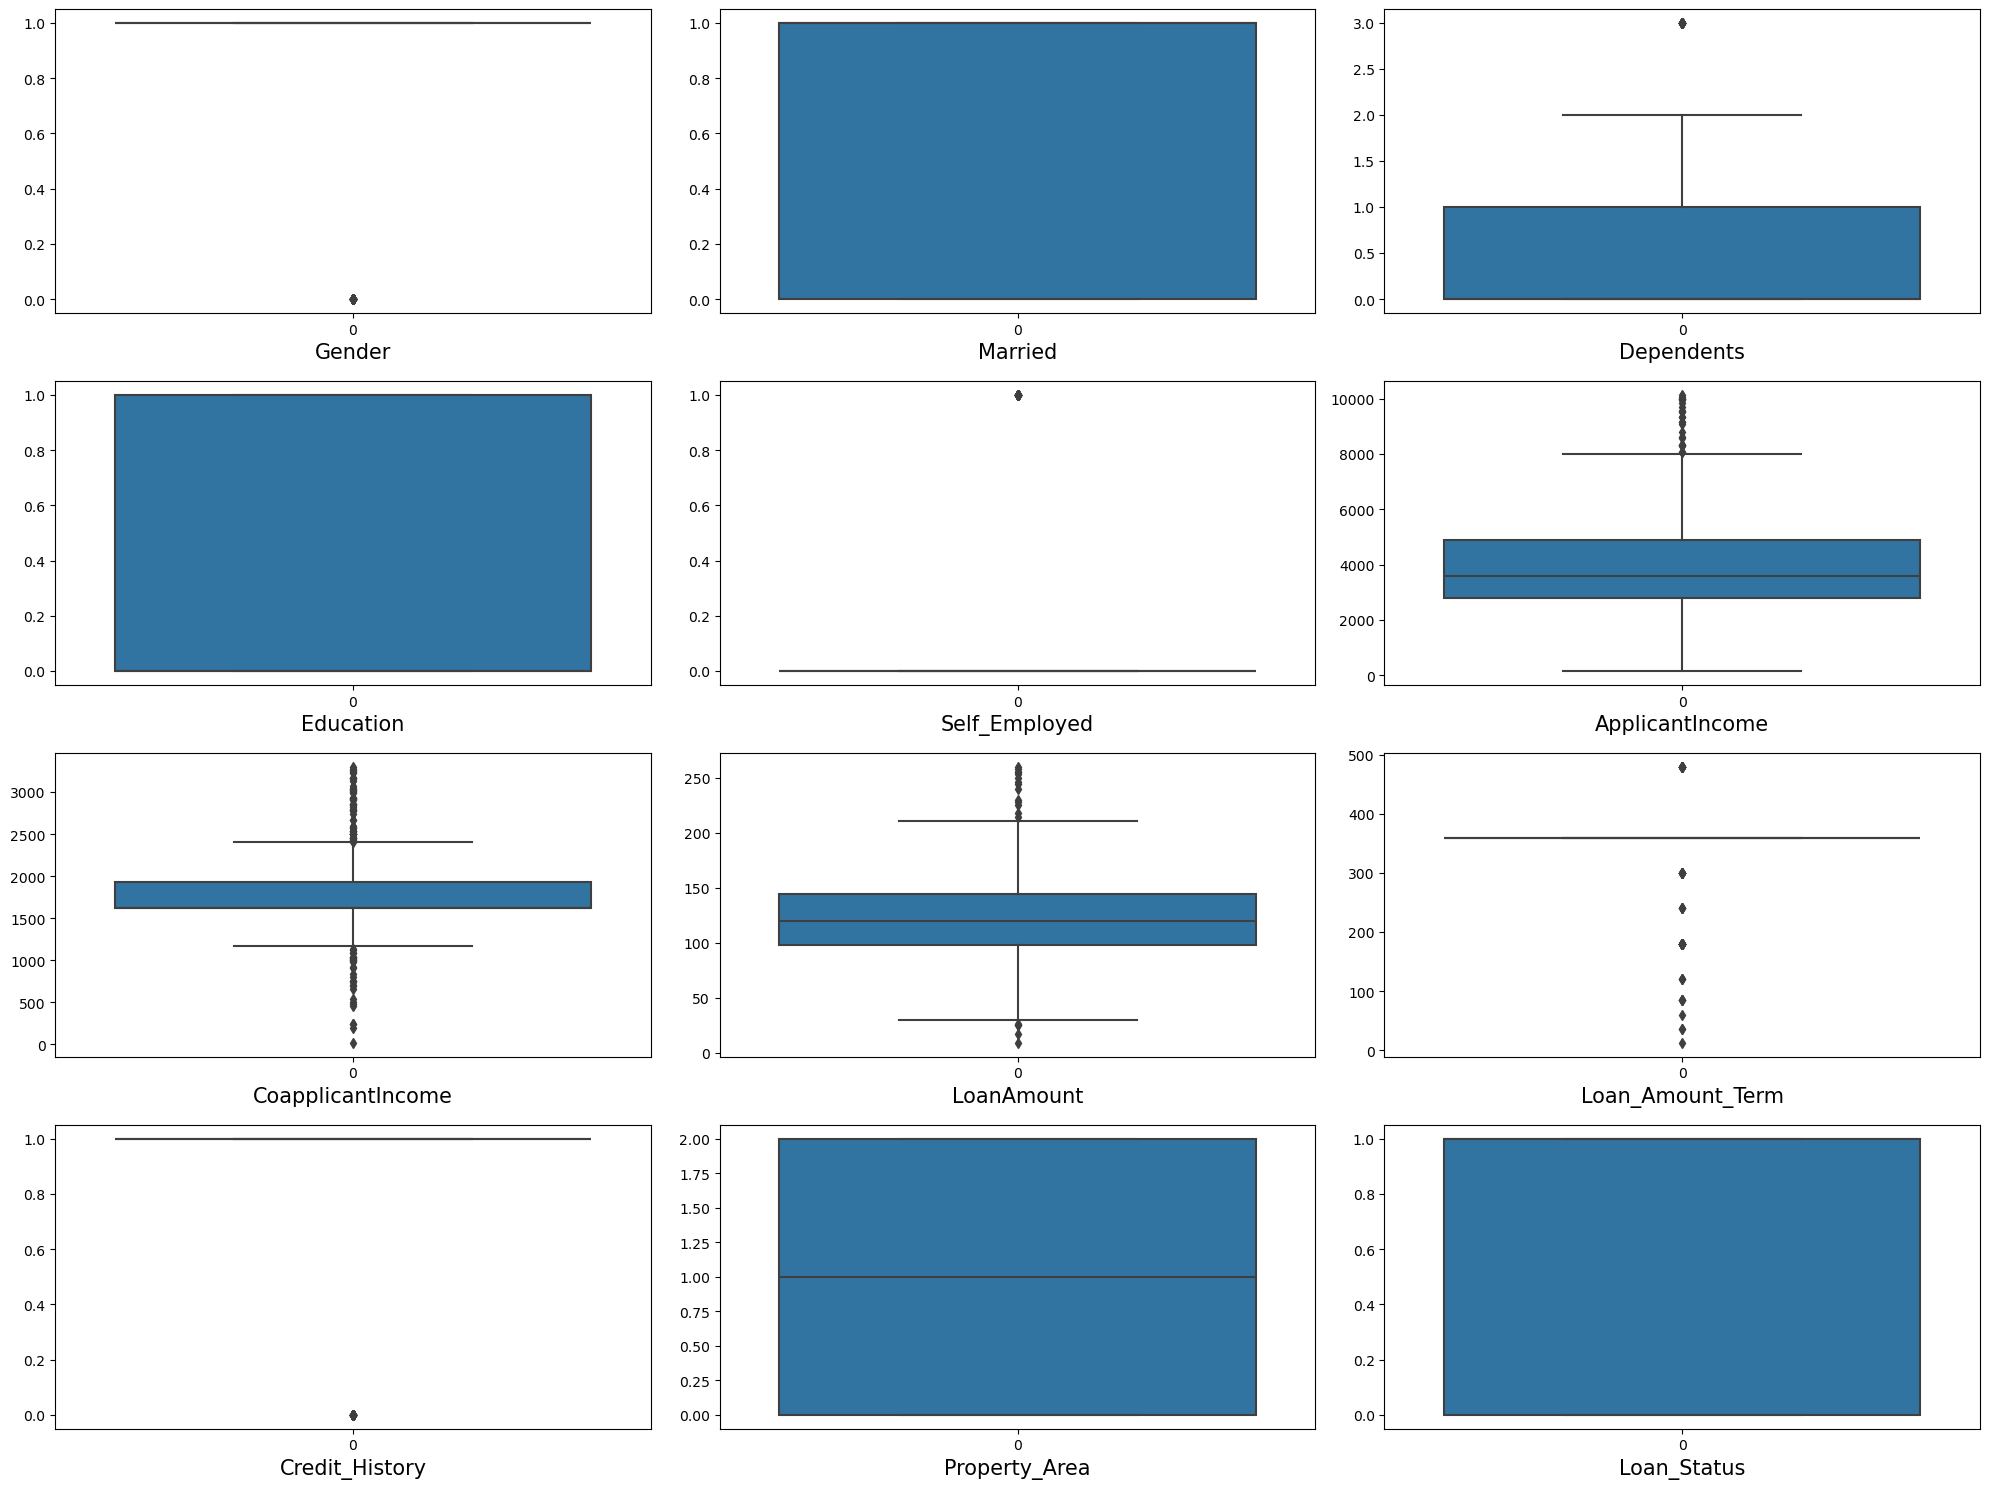

In [58]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=12:
        plt.subplot(4,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

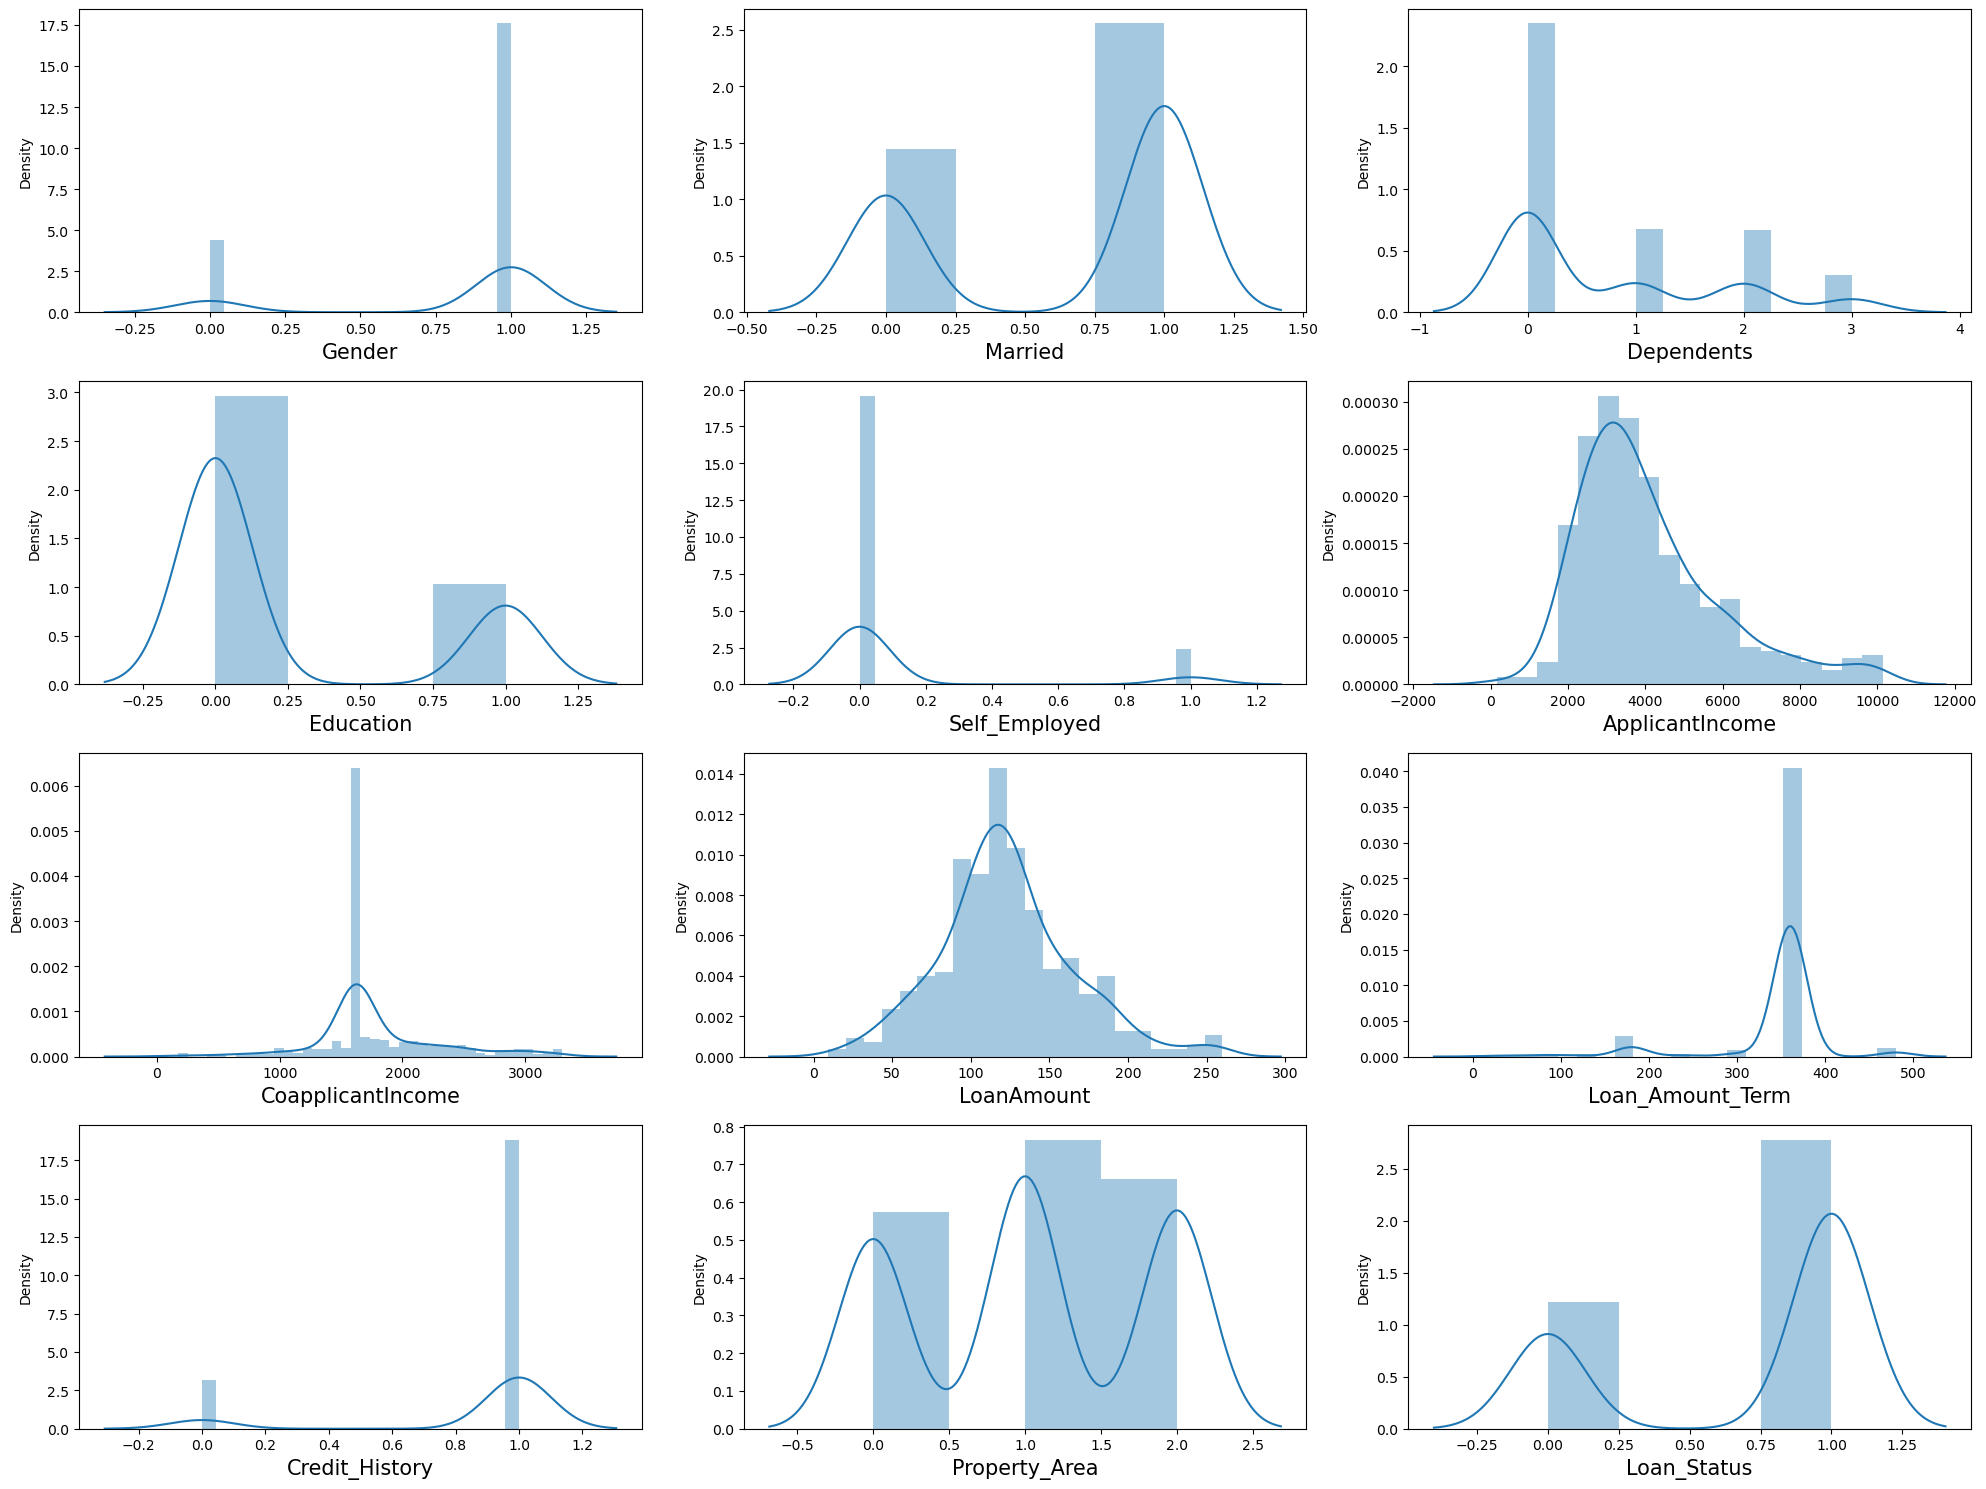

In [59]:
# Visualize the data distribution
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

* Now all the outliers have treated.
* Let's check the multicollinearity problem.

In [60]:
df_corr=df.corr().abs()

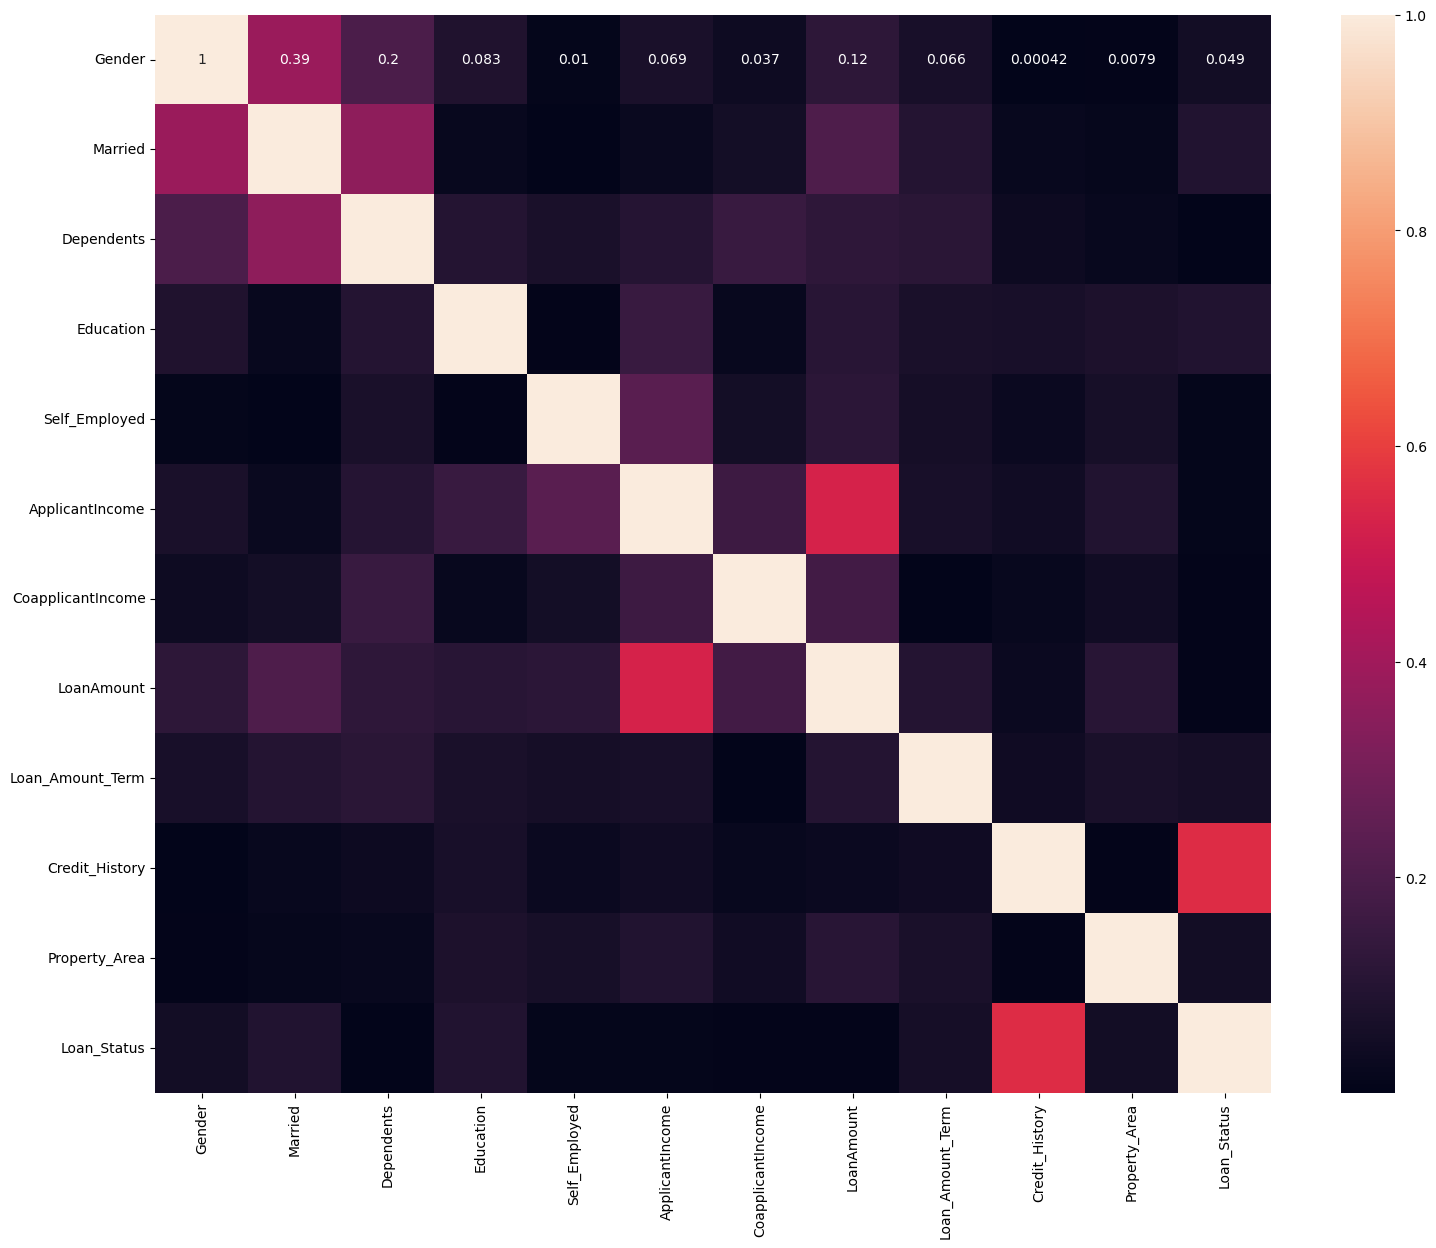

In [61]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [62]:
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.385954,0.197990,0.083156,0.010279,0.068883,0.036800,0.118568,0.065518,0.000424,0.007949,0.048605
Married,0.385954,1.000000,0.356150,0.021579,0.002248,0.024070,0.052179,0.206114,0.097099,0.020664,0.014209,0.088553
Dependents,0.197990,0.356150,1.000000,0.096442,0.067374,0.099923,0.148844,0.124375,0.112892,0.033417,0.022761,0.002497
Education,0.083156,0.021579,0.096442,1.000000,0.004716,0.151132,0.020355,0.108100,0.070437,0.066053,0.074730,0.089925
Self_Employed,0.010279,0.002248,0.067374,0.004716,1.000000,0.231122,0.051746,0.114639,0.055578,0.031326,0.061542,0.011393
ApplicantIncome,0.068883,0.024070,0.099923,0.151132,0.231122,1.000000,0.162635,0.528353,0.066681,0.046752,0.086384,0.010299
CoapplicantIncome,0.036800,0.052179,0.148844,0.020355,0.051746,0.162635,1.000000,0.175811,0.001249,0.023396,0.043389,0.007808
LoanAmount,0.118568,0.206114,0.124375,0.108100,0.114639,0.528353,0.175811,1.000000,0.097897,0.030510,0.109627,0.007234
Loan_Amount_Term,0.065518,0.097099,0.112892,0.070437,0.055578,0.066681,0.001249,0.097897,1.000000,0.039512,0.067132,0.055317
Credit_History,0.000424,0.020664,0.033417,0.066053,0.031326,0.046752,0.023396,0.030510,0.039512,1.000000,0.007764,0.555818


* Since there is no high multicollinearity here, we'll further go to model Training 

### MODEL TRAINING
* Since the Problem Statement is Classification, so we'll do model training on Logistic Regression.

In [63]:
# Split the dataset for training and testing set
X = df.drop(columns='Loan_Status', axis=1)
y = df['Loan_Status']

In [64]:
#standardization 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [65]:
# Lets do the train test split with scaled data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

In [66]:
# Shape of the training and testing set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(363, 11)
(363,)
(121, 11)
(121,)


In [67]:
#Logistic Regression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [68]:
#Predict the Loan status give feature
df.tail(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,1,1,2,0,0,7583,1621.245798,187.0,360.0,1.0,2,1
613,0,0,0,0,1,4583,1621.245798,133.0,360.0,0.0,1,0


In [69]:
#Since we vahe already fit the scaler . you can tranform the data .
print("Loan Status: ",clf.predict(scaler.transform([[0,0,0,0,1,4583,1621.245798,133.0,360.0,0.0,1]])))

Loan Status:  [0]


In [70]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def metrics_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=clf.predict(X_test)
        print("=================Test Score======================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report",classification_report(y_test,pred))

In [72]:
#checking train and test score
metrics_score(clf,X_train,X_test,y_train,y_test,train=True)
metrics_score(clf,X_train,X_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   82.09366391184572
=================Test Score======================
Accuracy Score==>   80.99173553719008
Classification Report               precision    recall  f1-score   support

           0       0.93      0.39      0.55        36
           1       0.79      0.99      0.88        85

    accuracy                           0.81       121
   macro avg       0.86      0.69      0.71       121
weighted avg       0.83      0.81      0.78       121



In [73]:
# Confusion metrics
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[14, 22],
       [ 1, 84]], dtype=int64)

In [74]:
# Calculate Manually
(14+84)/(14+22+1+84)


0.8099173553719008

In [75]:
# ROC Curve for Model Performance
from sklearn.metrics import roc_curve


In [76]:
#Roc Curve
fpr,tpr,threshold =roc_curve(y_test,y_pred)

In [77]:
print('Threshold = ',threshold)
print('True Positive Rate = ',tpr)
print('False Positive Rate = ',fpr)

Threshold =  [inf  1.  0.]
True Positive Rate =  [0.         0.98823529 1.        ]
False Positive Rate =  [0.         0.61111111 1.        ]


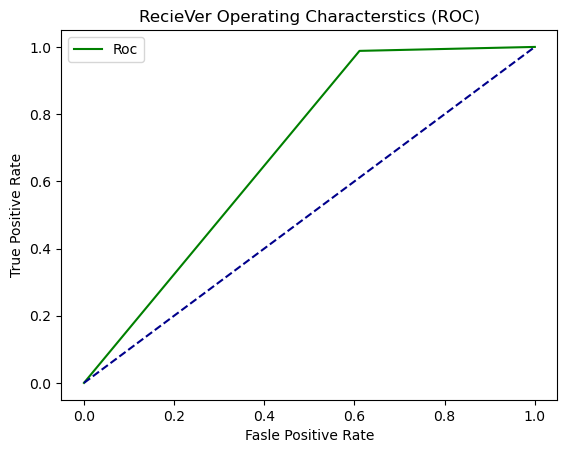

In [78]:
plt.plot(fpr,tpr,color='green',label='Roc')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('Fasle Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RecieVer Operating Characterstics (ROC)')
plt.legend()
plt.show()

In [79]:
#How Much area it is covered
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.688562091503268

* Since 68% area is covered more than the threshold the model performed better with training accuracy of 82% and test accuracy of 80% which is the model is not overfitted.